# Importing

In [483]:
# used to analysis data and make them readable and relevant
import pandas as pd
# to perform a wide variety of mathematical operations on arrays. 
import numpy as np
# lets the user interact with the native OS Python is currently running on
import os
import sys
# for analysing audio and music
import librosa
import librosa.display
# for making statistical graphics in Python.
import seaborn as sns
# for data visualization and graphical plotting
import matplotlib.pyplot as plt
#SS removes the mean and scales each feature/variable to unit variance.
#OHE used to transform one or more categorical features into numerical 
#dummy features useful for training machine learning model.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# help to use confusion_matrix and classification_report for modeling
from sklearn.metrics import confusion_matrix, classification_report
#to split our data into training and testing
from sklearn.model_selection import train_test_split
#Classification metric featuring a fraction of the predictions that a model got right.
from sklearn.metrics import accuracy_score
# to play the audio files
from IPython.display import Audio
from sklearn.metrics import plot_confusion_matrix
# for building support vector machine classifier
from sklearn import svm
# for building k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# for building Random forest classifier
from sklearn.ensemble import RandomForestClassifier
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [484]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

In [485]:
paths, labels = [], []

for dirname, _, filenames in os.walk(Ravdess):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')
            


Ravdess_df = pd.DataFrame({'Emotions': labels,'Path': paths})

Ravdess_df.head(7)

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
5      fear  /kaggle/input/ravdess-emotional-speech-audio/a...
6       sad  /kaggle/input/ravdess-emotional-speech-audio/a...

# Data Visualization and Exploration

In [486]:
Ravdess_df['Emotions'].value_counts()

surprise    192
disgust     192
fear        192
sad         192
calm        192
happy       192
angry       192
neutral      96
Name: Emotions, dtype: int64

<AxesSubplot:xlabel='Emotions', ylabel='count'>

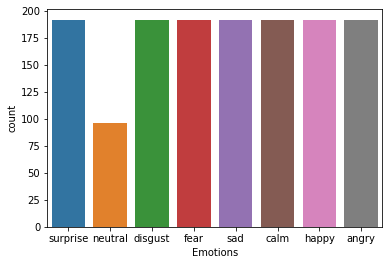

In [487]:
sns.countplot(Ravdess_df['Emotions'])

In [488]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

Waveplot and Spectogram for Each Emotion

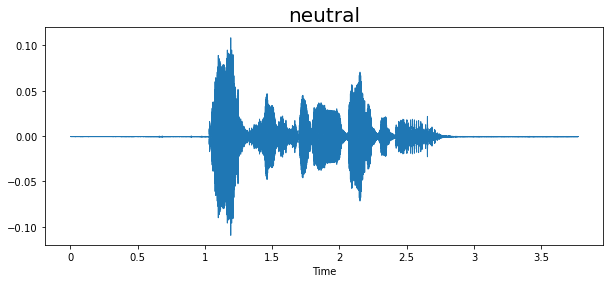

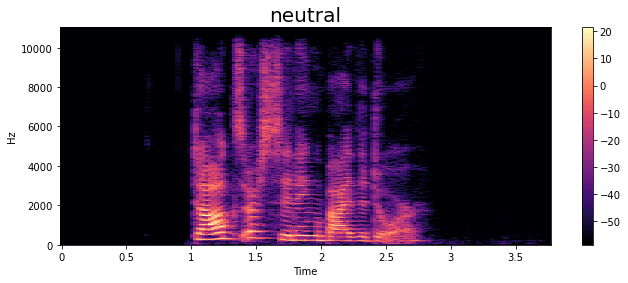

In [489]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

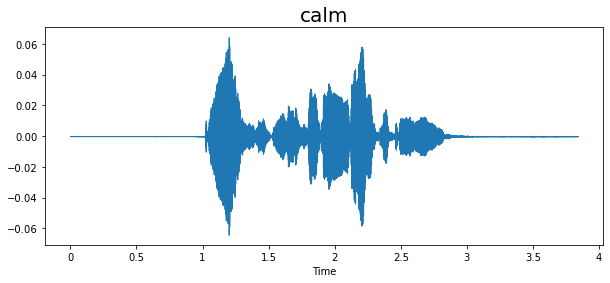

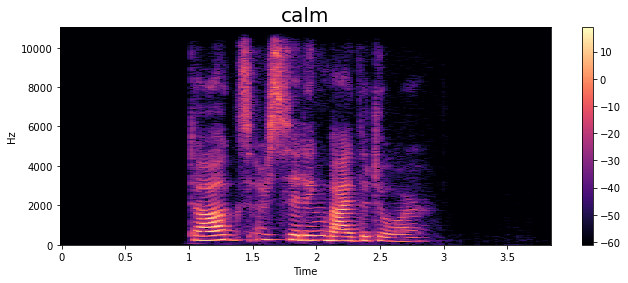

In [490]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

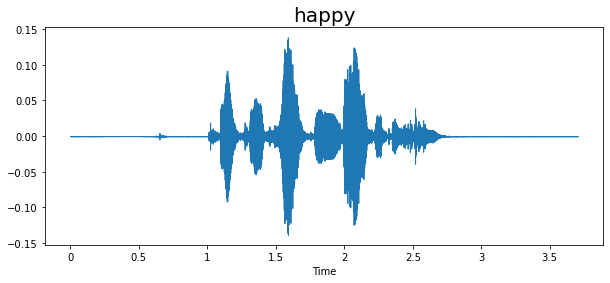

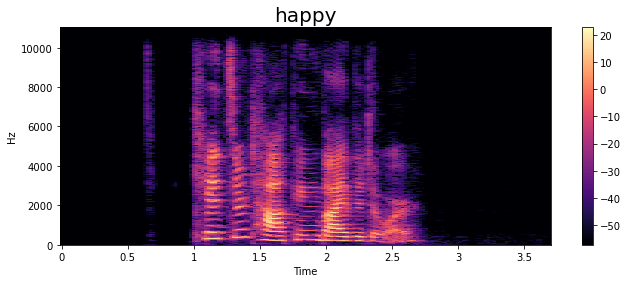

In [491]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

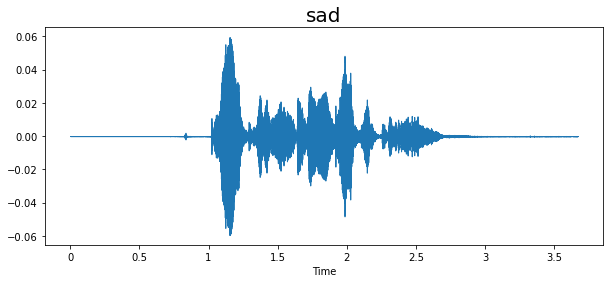

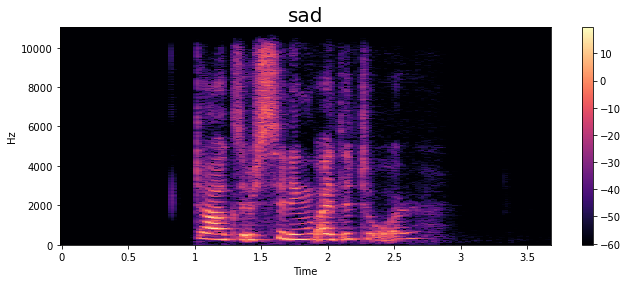

In [492]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

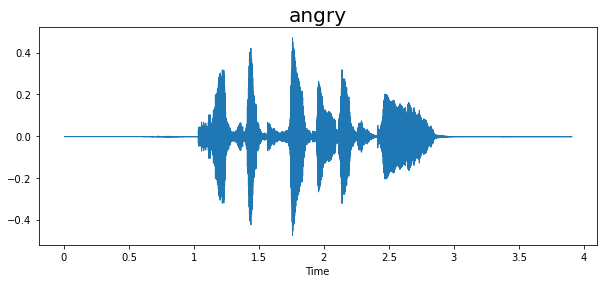

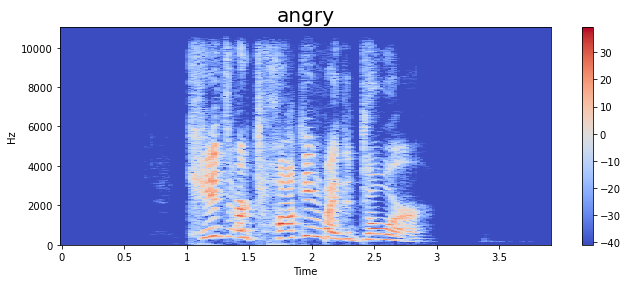

In [493]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

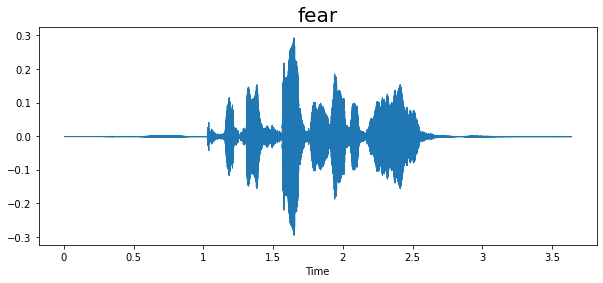

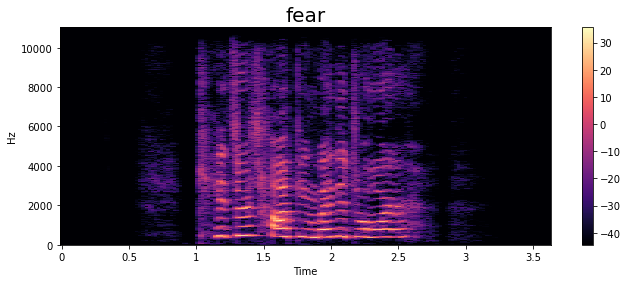

In [494]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

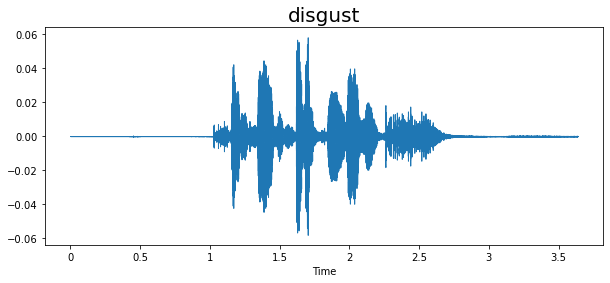

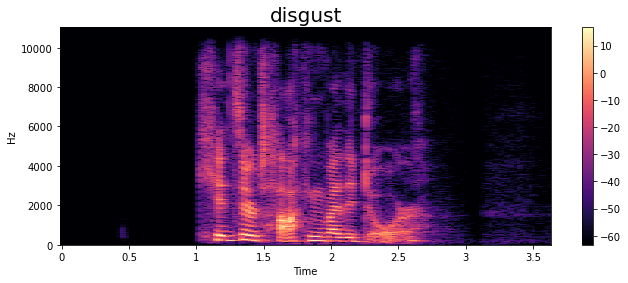

In [495]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

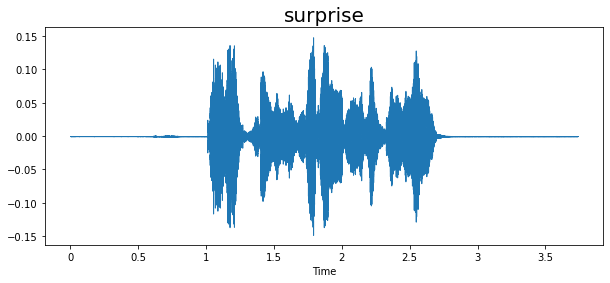

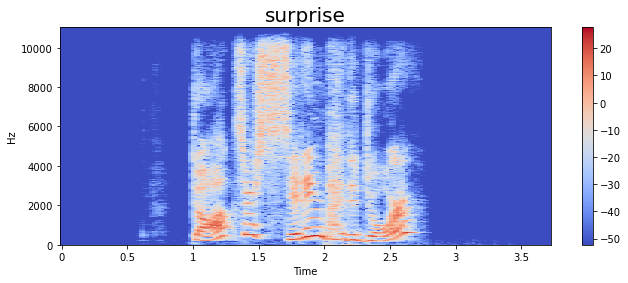

In [496]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Data Argumentation

# Featrue Extraction

In [497]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Data Preperation

In [498]:
X = []
for filename in Ravdess_df.Path:
    f=extract_mfcc(filename)
    X.append(f)

In [499]:
Y = []
for Emotions in Ravdess_df.Emotions:
    Y.append(Emotions)

In [500]:
len(X), len(Y), Ravdess_df.Path.shape

(1440, 1440, (1440,))

In [501]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.head(7)

0          1          2          3          4          5  \
0 -541.803223  46.443954 -19.874784  13.498628 -10.884650  -6.605676   
1 -616.190369  65.965248 -13.771617  11.089394  -7.634538  -3.460136   
2 -504.014404  64.279518 -20.179430   9.185249 -19.414026  -1.531277   
3 -605.887756  69.013451 -18.075569  12.204582 -13.360023   1.501657   
4 -576.958069  64.352692 -15.885159   6.523562  -8.178162  -2.997862   
5 -460.502838  20.720871 -34.343407  -3.493417 -16.973831 -12.811456   
6 -623.797607  54.785179  -7.385447   6.597789  -7.343570  -4.676839   

           6          7          8         9  ...         31         32  \
0  -5.969926  -4.756493  -5.807812 -2.154724  ...   5.547876  -0.282566   
1  -8.623556  -9.211994  -6.693782  0.205118  ...   4.043687   2.105733   
2 -10.310493 -14.358375 -10.348656  1.846216  ...   5.721119   1.288848   
3 -10.903937 -14.020959  -9.181472  1.129201  ...   3.265106  -0.752459   
4  -9.059199 -10.414946  -8.106849 -1.009292  ...   3.972769   0.928166   
5 -12.230027 -13.615689 -10.744131 -4.757533  ...   5.344975  -0.989012   
6 -12.451774 -13.178451  -6.462729 -2.624290  ...  10.089677  13.066502   

          33         34        35        36        37        38        39  \
0   3.491628   1.703370  5.340355  0.220993  2.985569  0.976326  2.099721   
1   5.345243   2.423556  3.402596 -2.148351  1.579090 -1.174739  0.812869   
2   2.605492  -0.794124  1.073960 -1.234064  1.462918 -0.554821  0.504924   
3   3.627135   2.063189  4.144424  1.222894  1.810304  0.091111  2.341632   
4   2.518744   1.648776  5.624789 -1.740521  0.784327 -1.501334  1.564304   
5   1.608579   1.234121  1.878792 -2.774425  3.912740  4.113506  1.681353   
6  14.693964  11.527715  7.726150 -1.628222  1.797705  1.408284  3.091264   

     labels  
0  surprise  
1   neutral  
2   disgust  
3   disgust  
4   neutral  
5      fear  
6       sad  

[7 rows x 41 columns]

In [502]:
Features.shape

(1440, 41)

In [503]:
X = Features.iloc[:,:-1].values
Y = Features['labels']

In [504]:
X.shape

(1440, 40)

In [505]:
Y.shape

(1440,)

In [506]:
# splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1152, 40), (288, 40), (1152,), (288,))

In [507]:
#Scaling , used to normalize data by subtracting the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1152, 40), (288, 40), (1152,), (288,))

# Modelling

### SVM

In [508]:
clf = svm.SVC(kernel='linear', gamma='auto', C=2)
clf = clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)

In [509]:
print(classification_report(Y_test, y_predict))
svm_training_score = clf.score(X_train, Y_train)
print("The training score is:")
print(svm_training_score)
svm_testing_score = clf.score(X_test, Y_test)
print("The testing score is:")
print(svm_testing_score)

              precision    recall  f1-score   support

       angry       0.56      0.83      0.67        29
        calm       0.49      0.63      0.55        43
     disgust       0.34      0.34      0.34        38
        fear       0.39      0.37      0.38        38
       happy       0.52      0.38      0.44        45
     neutral       0.26      0.35      0.30        17
         sad       0.50      0.39      0.44        46
    surprise       0.33      0.25      0.29        32

    accuracy                           0.44       288
   macro avg       0.42      0.44      0.42       288
weighted avg       0.44      0.44      0.43       288

The training score is:
0.6605902777777778
The testing score is:
0.4409722222222222


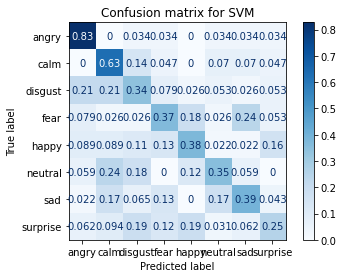

In [510]:
matrix = plot_confusion_matrix(clf, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM')
plt.show(matrix)

### KNN

In [511]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
y_predict = knn.predict(X_test)

In [512]:
print(classification_report(Y_test, y_predict))
knn_training_score = knn.score(X_train, Y_train)
print("The training score is:")
print(knn_training_score)
knn_testing_score = knn.score(X_test, Y_test)                               
print("The testing score is:")
print(knn_testing_score)

              precision    recall  f1-score   support

       angry       0.47      0.59      0.52        29
        calm       0.61      0.84      0.71        43
     disgust       0.64      0.61      0.62        38
        fear       0.37      0.50      0.42        38
       happy       0.22      0.11      0.15        45
     neutral       0.12      0.12      0.12        17
         sad       0.62      0.28      0.39        46
    surprise       0.42      0.59      0.49        32

    accuracy                           0.47       288
   macro avg       0.43      0.45      0.43       288
weighted avg       0.46      0.47      0.44       288

The training score is:
0.6640625
The testing score is:
0.4652777777777778


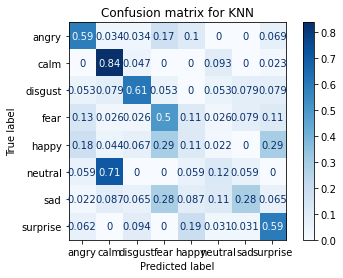

In [513]:
matrix = plot_confusion_matrix(knn, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for KNN')
plt.show(matrix)

### Random Forest

In [514]:
rf=RandomForestClassifier(n_estimators=300,max_depth=5,min_samples_split=3)
rf.fit(X_train, Y_train)
y_predict = rf.predict(X_test)

In [515]:
print(classification_report(Y_test, y_predict))
rf_training_score = rf.score(X_train, Y_train)
print("The training score is:")
print(rf_training_score)
rf_testing_score = rf.score(X_test, Y_test)
print("The testing score is:")
print(rf_testing_score)

              precision    recall  f1-score   support

       angry       0.58      0.62      0.60        29
        calm       0.44      0.91      0.60        43
     disgust       0.43      0.42      0.43        38
        fear       0.41      0.29      0.34        38
       happy       0.39      0.16      0.22        45
     neutral       0.00      0.00      0.00        17
         sad       0.35      0.24      0.29        46
    surprise       0.38      0.66      0.48        32

    accuracy                           0.43       288
   macro avg       0.37      0.41      0.37       288
weighted avg       0.39      0.43      0.38       288

The training score is:
0.6545138888888888
The testing score is:
0.4270833333333333


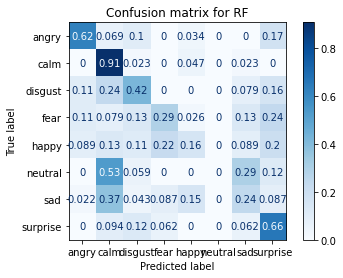

In [516]:
matrix = plot_confusion_matrix(rf, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for RF')
plt.show(matrix)